In [ ]:
!pip install dtreeviz

In [2]:
from dtreeviz.trees import dtreeviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as skms
import sklearn.datasets as skds
import sklearn.metrics as skm
import sklearn.tree as sktree

In [3]:
data = pd.DataFrame({"¿Puede sobrevivir en superficie?":[1,1,1,0,0],
                     "¿Tiene aletas?":[1,1,0,1,1],
                     "¿Es Pez?":[1,1,0,0,0]})
data

,¿Puede sobrevivir en superficie?,¿Tiene aletas?,¿Es Pez?
0,1,1,1
1,1,1,1
2,1,0,0
3,0,1,0
4,0,1,0


In [7]:
modelo = sktree.DecisionTreeClassifier(random_state=0)
modelo.fit(data.iloc[:,:2],data.iloc[:,2]) #todas las filas, hasta la columna 1 // todas las filas, solo la columna 2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
texto = sktree.export_text(modelo,feature_names=list(data.columns)[:2] )
print(texto)

|--- ¿Puede sobrevivir en superficie? <= 0.50
|   |--- class: 0
|--- ¿Puede sobrevivir en superficie? >  0.50
|   |--- ¿Tiene aletas? <= 0.50
|   |   |--- class: 0
|   |--- ¿Tiene aletas? >  0.50
|   |   |--- class: 1



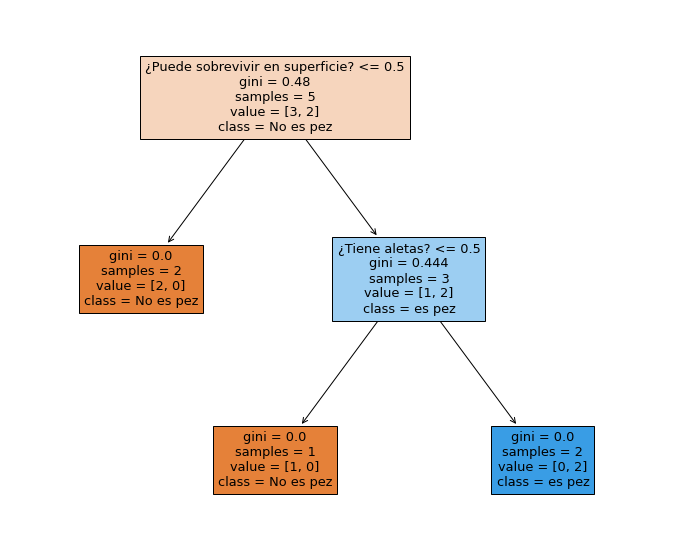

In [9]:
plt.figure(figsize=(12,10))
_ = sktree.plot_tree(modelo,feature_names=list(data.columns)[:2], 
                     filled=True,class_names=["No es pez","es pez"])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


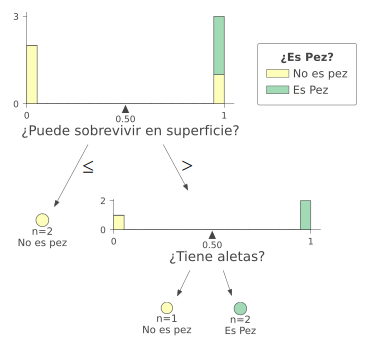

In [10]:
viz = dtreeviz(modelo,data.iloc[:,:2],data.iloc[:,2],
               target_name="¿Es Pez?",feature_names=list(data.columns)[:-1],
               class_names=["No es pez","Es Pez"],scale=1.5)
#viz.save()
viz

In [11]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv -O titanic.csv

--2021-06-01 17:04:04--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.08s   

2021-06-01 17:04:04 (570 KB/s) - ‘titanic.csv’ saved [44225/44225]



In [16]:
data = pd.read_csv("titanic.csv")
data.pop("Name")
data

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [17]:
data["masculino"]=0
data.loc[data["Sex"]=="male",["masculino"]]=1 #para los casos dela comlumna "Sex"="male"
                                              #en la columna "masculino" asigno 1
data.pop("Sex")
data.head()


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,masculino
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [18]:
xtrain,xtest,ytrain,ytest = skms.train_test_split(data.iloc[:,1:], data.iloc[:,0], 
                                                  test_size=0.3, random_state=0)

In [19]:
modelo = sktree.DecisionTreeClassifier(random_state=0)
modelo.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

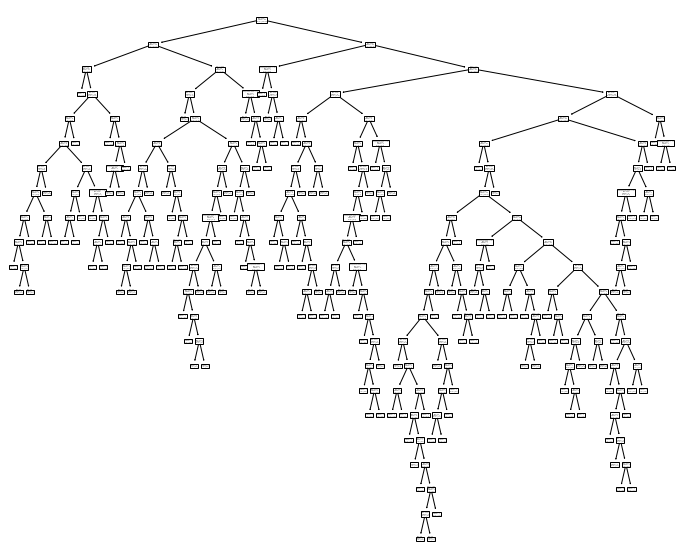

In [20]:
plt.figure(figsize=(12,10))
_ = sktree.plot_tree(modelo,feature_names=list(data.columns)[1:])

In [21]:
print("acc en el training set",skm.accuracy_score(ytrain,modelo.predict(xtrain)))
print("acc en el training set",skm.accuracy_score(ytest,modelo.predict(xtest)))

acc en el training set 0.9806451612903225
acc en el training set 0.7790262172284644


In [22]:
importancia = pd.DataFrame({"x":list(data.columns)[1:],
                            "importancia":modelo.feature_importances_})
importancia.sort_values("importancia",ascending=False)

,x,importancia
5,masculino,0.320037
4,Fare,0.262286
1,Age,0.251841
0,Pclass,0.098154
2,Siblings/Spouses Aboard,0.051942
3,Parents/Children Aboard,0.015740


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


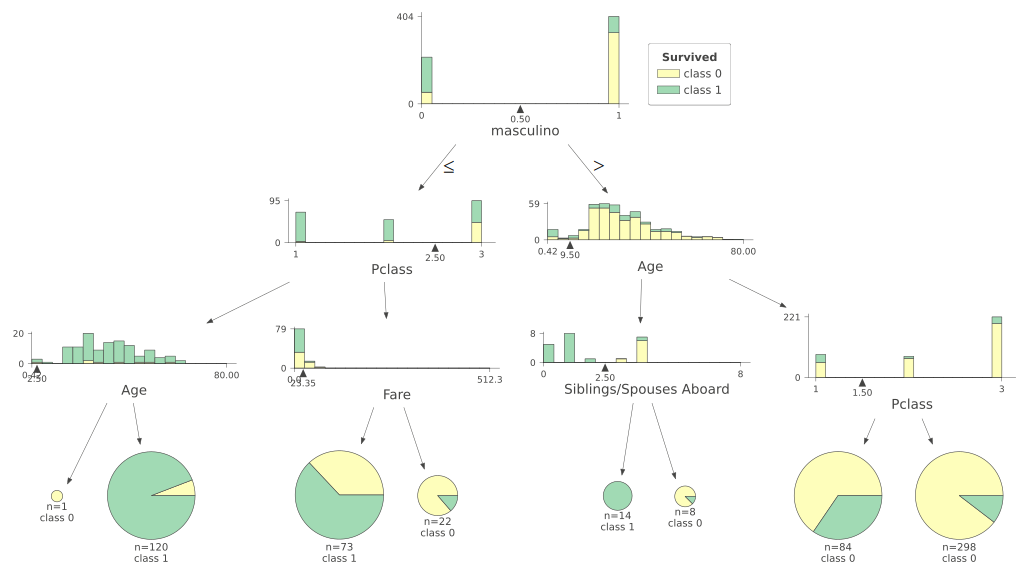

<Figure size 1152x720 with 0 Axes>

In [23]:
modelo = sktree.DecisionTreeClassifier(random_state=0,max_depth=3)
modelo.fit(xtrain,ytrain)
plt.figure(figsize=(16,10))
viz = dtreeviz(modelo, xtrain, ytrain, target_name="Survived", 
               feature_names = list(data.columns)[1:],scale=1.5)
viz

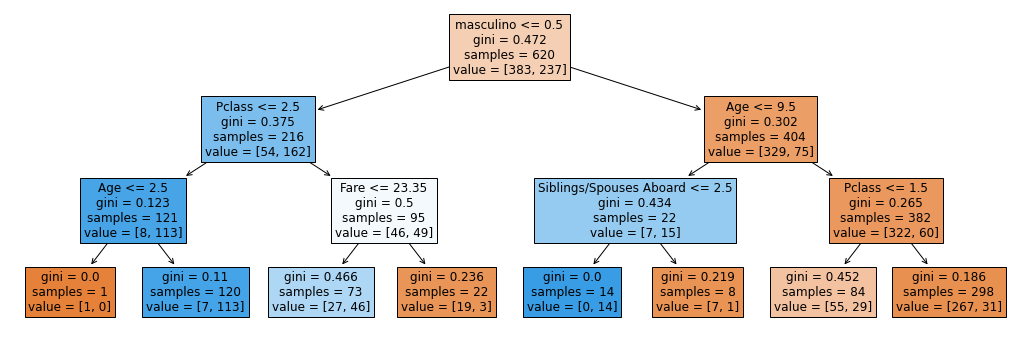

In [24]:
plt.figure(figsize=(18,6))
_=sktree.plot_tree(modelo,feature_names = list(data.columns)[1:],filled=True,fontsize=12)

In [25]:
importancia2 = pd.DataFrame({"x":list(data.columns)[1:],
                            "importancia":modelo.feature_importances_})
importancia2.sort_values("importancia",ascending=False)

,x,importancia
5,masculino,0.617720
0,Pclass,0.180725
1,Age,0.091050
4,Fare,0.056796
2,Siblings/Spouses Aboard,0.053710
3,Parents/Children Aboard,0.000000


In [26]:
print("acc. training set=",skm.accuracy_score(ytrain,modelo.predict(xtrain)))
print("acc. test set=",skm.accuracy_score(ytest,modelo.predict(xtest)))

acc. training set= 0.8419354838709677
acc. test set= 0.8089887640449438


In [27]:
#hallando la profundidad optima
acc_values = []
for i in range(1, 20):
  modelox = sktree.DecisionTreeClassifier(random_state = 0, max_depth = i)
  modelox.fit(xtrain, ytrain)
  acc = skm.accuracy_score(ytest, modelox.predict(xtest))
  print("Profundidad:",i,"Acc Test set:", acc)
  acc_values.append(acc)
print("Valor Máximo : ", max(acc_values), "\nNúmero de profundidad : ", acc_values.index(max(acc_values))+1)

Profundidad: 1 Acc Test set: 0.7715355805243446
Profundidad: 2 Acc Test set: 0.7640449438202247
Profundidad: 3 Acc Test set: 0.8089887640449438
Profundidad: 4 Acc Test set: 0.7715355805243446
Profundidad: 5 Acc Test set: 0.7902621722846442
Profundidad: 6 Acc Test set: 0.8089887640449438
Profundidad: 7 Acc Test set: 0.797752808988764
Profundidad: 8 Acc Test set: 0.7940074906367042
Profundidad: 9 Acc Test set: 0.8202247191011236
Profundidad: 10 Acc Test set: 0.797752808988764
Profundidad: 11 Acc Test set: 0.797752808988764
Profundidad: 12 Acc Test set: 0.8014981273408239
Profundidad: 13 Acc Test set: 0.7940074906367042
Profundidad: 14 Acc Test set: 0.7902621722846442
Profundidad: 15 Acc Test set: 0.7940074906367042
Profundidad: 16 Acc Test set: 0.7865168539325843
Profundidad: 17 Acc Test set: 0.7752808988764045
Profundidad: 18 Acc Test set: 0.7790262172284644
Profundidad: 19 Acc Test set: 0.7790262172284644
Valor Máximo :  0.8202247191011236 
Número de profundidad :  9


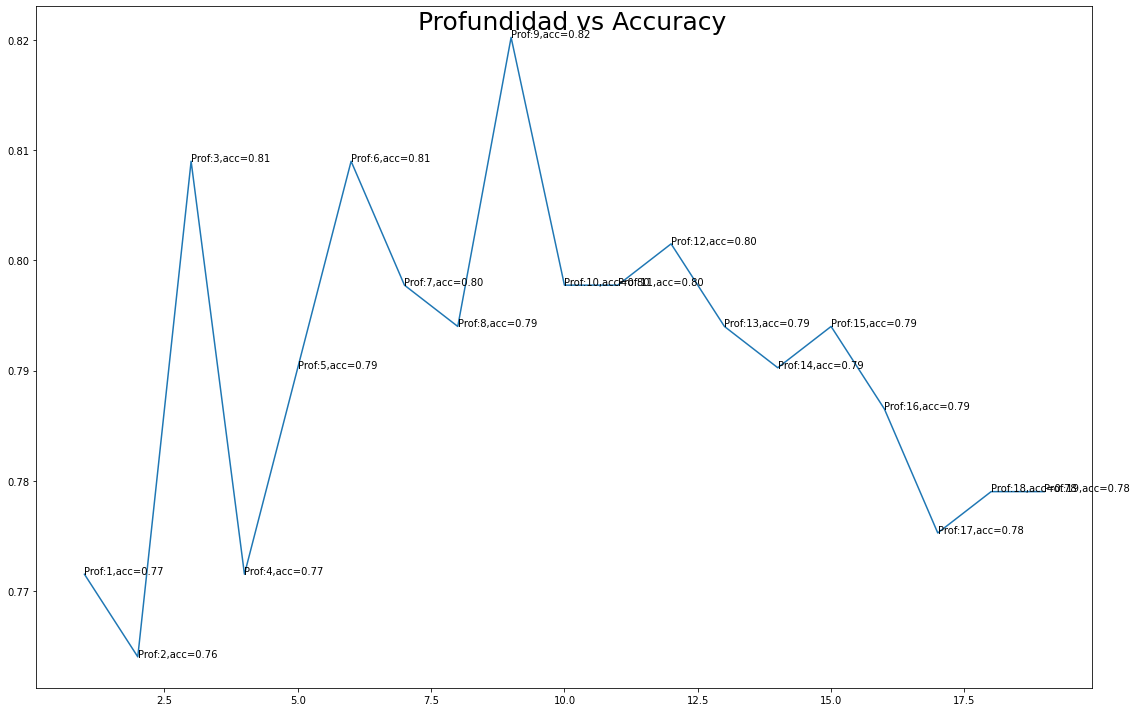

In [35]:
plt.figure(figsize=(16,10))
plt.suptitle("Profundidad vs Accuracy", fontsize=25)
xp = list(range(1,20))

plt.plot(xp,acc_values)

for pt in zip(xp,acc_values):
  plt.annotate("Prof:{},acc={:.2f}".format(pt[0],pt[1]),pt)
plt.tight_layout()

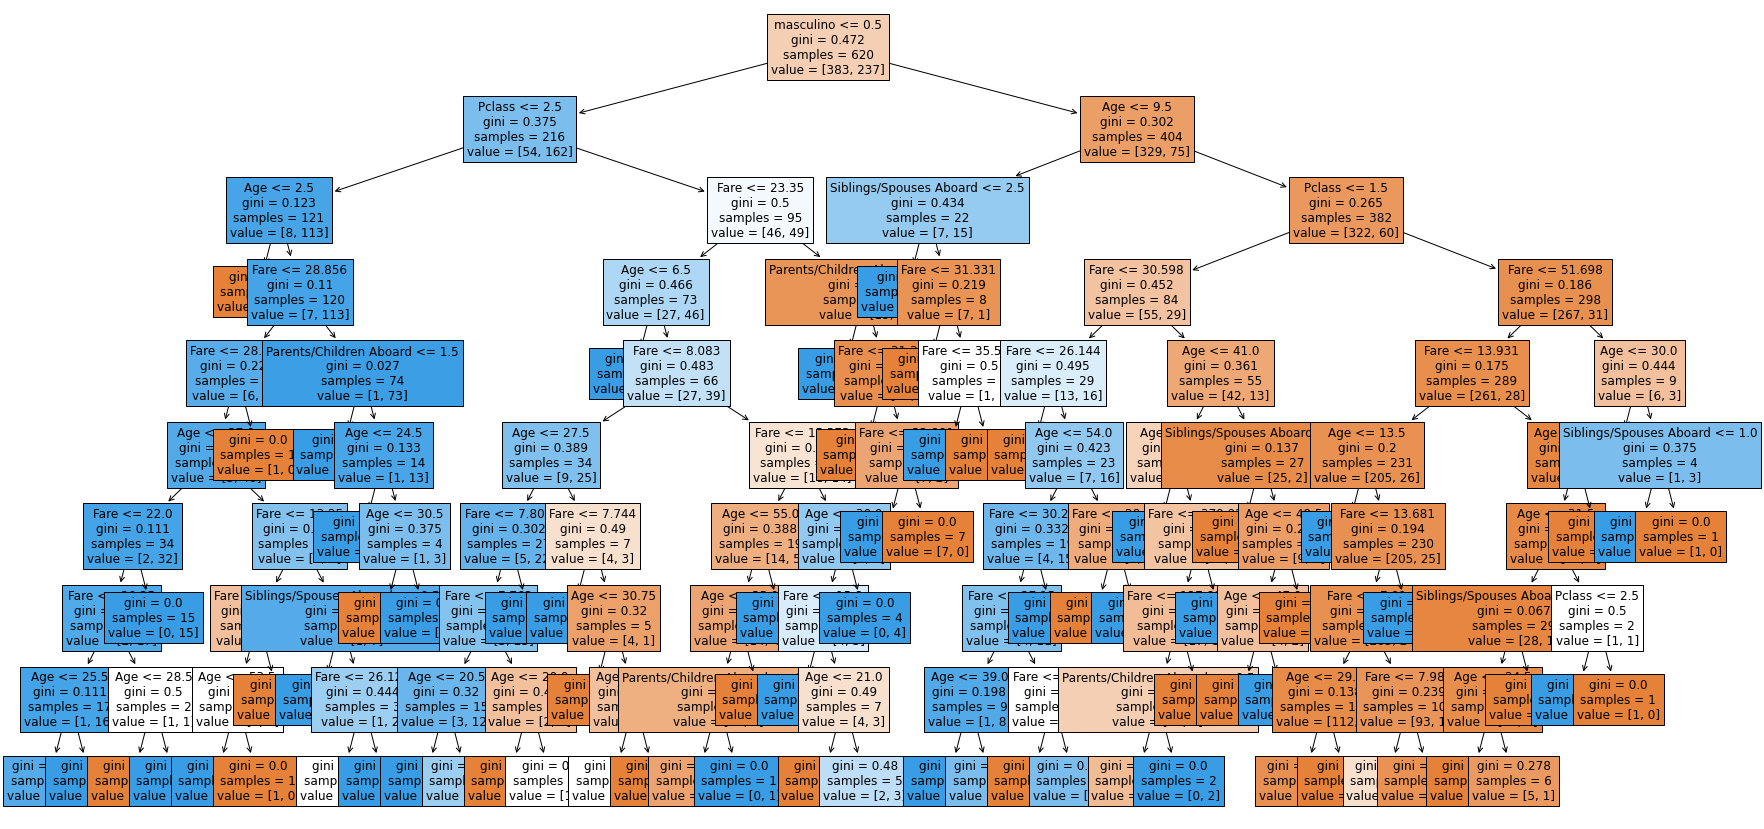

In [36]:
modelo = sktree.DecisionTreeClassifier(random_state = 0, max_depth = 9)
modelo.fit(xtrain, ytrain)
plt.figure(figsize=(30,15))
_=sktree.plot_tree(modelo,feature_names = list(data.columns)[1:],filled=True,fontsize=12)

In [37]:
plt.figure(figsize=(16,10))
viz = dtreeviz(modelo, xtrain, ytrain, target_name="Survived", 
               feature_names = list(data.columns)[1:],scale=1)
viz

Output hidden; open in https://colab.research.google.com to view.

In [38]:
importancia3 = pd.DataFrame({"x":list(data.columns)[1:],
                            "importancia":modelo.feature_importances_})
importancia3.sort_values("importancia",ascending=False)

,x,importancia
5,masculino,0.401249
4,Fare,0.219486
1,Age,0.191246
0,Pclass,0.121868
2,Siblings/Spouses Aboard,0.045900
3,Parents/Children Aboard,0.020252


In [39]:
iris = skds.load_iris()

In [40]:
xnombres = ["SL","SW","PL","PW"]
data = pd.DataFrame(iris.data,columns=xnombres)
data["clase"] = iris.target
data

,SL,SW,PL,PW,clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
xtrain,xtest,ytrain,ytest = skms.train_test_split(data[xnombres],data["clase"],
                                                  test_size=0.3,random_state=0)

acc. training set= 1.0
acc. test set= 0.9777777777777777


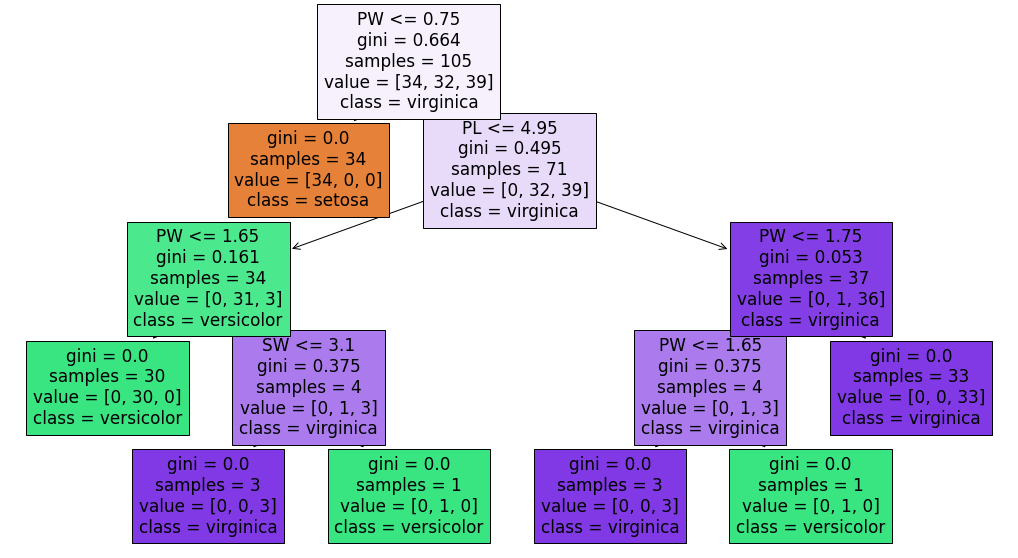

In [43]:
modelo = sktree.DecisionTreeClassifier(random_state=0)
modelo.fit(xtrain,ytrain)
print("acc. training set=",skm.accuracy_score(ytrain,modelo.predict(xtrain)))
print("acc. test set=",skm.accuracy_score(ytest,modelo.predict(xtest)))
plt.figure(figsize=(18,10))
_ = sktree.plot_tree(modelo,feature_names=xnombres,filled=True,class_names=iris.target_names)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


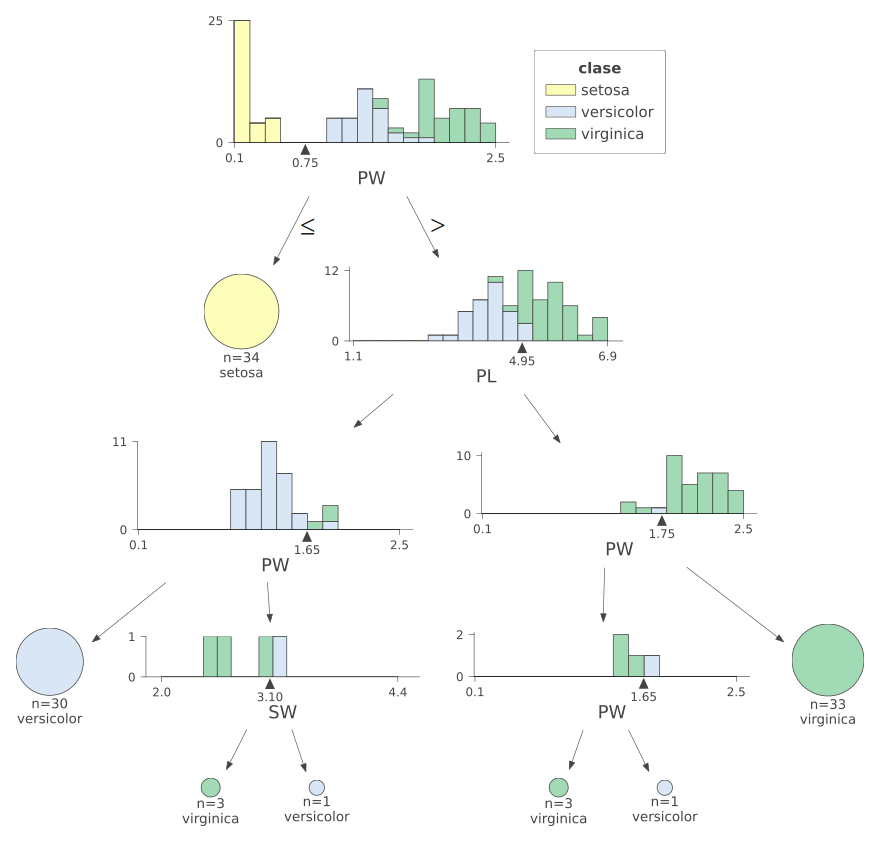

<Figure size 1800x1440 with 0 Axes>

In [44]:
plt.figure(figsize=(25,20))
viz = dtreeviz(modelo,xtrain,ytrain,target_name="clase",feature_names=xnombres,
               class_names=list(iris.target_names),scale=2)
viz

In [45]:
importancia = pd.DataFrame({"x":xnombres,
                            "importancia":modelo.feature_importances_})
importancia.sort_values("importancia",ascending=False)

,x,importancia
3,PW,0.580826
2,PL,0.397670
1,SW,0.021505
0,SL,0.000000
